<a href="https://colab.research.google.com/github/tajuar-akash-hub/Machine-learning-algorithms/blob/main/Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tajuar-akash-hub/Datasets.git

Cloning into 'Datasets'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 477.69 KiB | 4.26 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [2]:
!pip install geopandas

In [3]:
import pandas as pd
data = '/content/Datasets/diabetes_two.csv'
df = pd.read_csv("/content/Datasets/diabetes_two.csv")
df.head(1)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 519 non-null    float64
 1   Gender              519 non-null    object 
 2   Polyuria            520 non-null    object 
 3   Polydipsia          520 non-null    object 
 4   sudden weight loss  520 non-null    object 
 5   weakness            519 non-null    object 
 6   Polyphagia          520 non-null    object 
 7   Genital thrush      520 non-null    object 
 8   visual blurring     520 non-null    object 
 9   Itching             520 non-null    object 
 10  Irritability        520 non-null    object 
 11  delayed healing     520 non-null    object 
 12  partial paresis     520 non-null    object 
 13  muscle stiffness    520 non-null    object 
 14  Alopecia            520 non-null    object 
 15  Obesity             520 non-null    object 
 16  class   

# Age

In [5]:
df['Age'][2]

nan

In [ ]:
# @title AGE
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    AGE
    </strong>
</p>
"""

display(HTML(html_code))

In [6]:
df['Age'][4]  #Age 600?

600.0

In [7]:
df['Age'].median()   # The median is a statistical measure that represents the middle value in a sorted dataset.

48.0

In [ ]:
df['Age'] = df["Age"].fillna(df["Age"].median())   #Replace Age with median

# Gender

In [ ]:
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    GEnder
    </strong>
</p>
"""

display(HTML(html_code))

In [ ]:
df['Gender'].unique()

array(['Male', nan, 'Female'], dtype=object)

In [ ]:
df['Gender'].mode()

,Gender
0,Male


In [ ]:
df['Gender'].mode().iloc[0]   # in df['Gender'].mode() there is one value


#The iloc[0] in pandas refers to accessing the first row of a DataFrame or Series based on its integer position

'Male'

In [ ]:
most_frequent_category = df["Gender"].mode().iloc[0]  ##The iloc[0] in pandas refers to accessing the first row of a DataFrame or Series based on its integer position

df['Gender'].fillna(most_frequent_category,inplace=True)   #replace

# With inplace=True: The original DataFrame (df) is modified directly.

<ipython-input-15-2171ac53650c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(most_frequent_category,inplace=True)   #replace


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,1
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


# weakness

In [ ]:
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    Weakness
    </strong>
</p>
"""

display(HTML(html_code))

In [ ]:
df['weakness'].unique()

array(['Yes', nan, 'No'], dtype=object)

In [ ]:
df['weakness']

,weakness
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
515,No
516,Yes
517,Yes
518,Yes


In [ ]:
df['weakness'] = df['weakness'].fillna(method='ffill')  # onward Fill (using the previous value)


<ipython-input-20-01f6e6fbca2b>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['weakness'] = df['weakness'].fillna(method='ffill')  # onward Fill (using the previous value)


# Encoding

In [ ]:
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    Encoding
    </strong>
</p>
"""

display(HTML(html_code))

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [ ]:
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    Label Encoder
    </strong>
</p>
"""

display(HTML(html_code))

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
df["Gender"] = le.fit_transform(df['Gender'])
#ques : how this is working? didn't get it!

df["Polyuria"] = le.fit_transform(df['Polyuria'])

df["Polydipsia"] = le.fit_transform(df['Polydipsia'])

df["sudden weight loss"] = le.fit_transform(df['sudden weight loss'])

df["weakness"] = le.fit_transform(df['weakness'])

df["Polyphagia"] = le.fit_transform(df['Polyphagia'])

df["Genital thrush"] = le.fit_transform(df['Genital thrush'])

df["visual blurring"] = le.fit_transform(df['visual blurring'])

df["Itching"] = le.fit_transform(df['Itching'])

df["Irritability"] = le.fit_transform(df['Irritability'])

df["delayed healing"] = le.fit_transform(df['delayed healing'])

df["partial paresis"] = le.fit_transform(df['partial paresis'])

df["muscle stiffness"] = le.fit_transform(df['muscle stiffness'])

df["Alopecia"] = le.fit_transform(df['Alopecia'])


df["Obesity"] = le.fit_transform(df['Obesity'])

df["class"] = le.fit_transform(df['class'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 520 non-null    float64
 1   Gender              520 non-null    int64  
 2   Polyuria            520 non-null    int64  
 3   Polydipsia          520 non-null    int64  
 4   sudden weight loss  520 non-null    int64  
 5   weakness            520 non-null    int64  
 6   Polyphagia          520 non-null    int64  
 7   Genital thrush      520 non-null    int64  
 8   visual blurring     520 non-null    int64  
 9   Itching             520 non-null    int64  
 10  Irritability        520 non-null    int64  
 11  delayed healing     520 non-null    int64  
 12  partial paresis     520 non-null    int64  
 13  muscle stiffness    520 non-null    int64  
 14  Alopecia            520 non-null    int64  
 15  Obesity             520 non-null    int64  
 16  class   

# 'Class' or target

In [ ]:
# @title Default title text
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    Class or Target
    </strong>
</p>
"""

display(HTML(html_code))

In [ ]:
df.groupby('class').size()

# df.groupby('class'):
# This groups the data in the DataFrame df by the values in the 'class' column.

# Each unique value in the 'class' column will form a group.

# size() calculates the size (number of rows) in each group.

,0
class,
0,200
1,320


In [ ]:
df.groupby('class').size().reset_index(name='count')

# The reset_index() method is used to convert the grouped results back into a DataFrame.

# The name='count' argument renames the second column in the resulting DataFrame to 'count' (which stores the number of occurrences for each class).

,class,count
0,0,200
1,1,320


In [ ]:
value_counts = df.groupby('class').size().reset_index(name='count')

print(value_counts)

   class  count
0      0    200
1      1    320


# Outliers

In [ ]:
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    OUtliers
    </strong>
</p>
"""

display(HTML(html_code))

In [ ]:
z_score = (df['Age'] - df['Age'].mean())/df['Age'].std()


In [ ]:
for i in z_score:
  if i<-3:
    print("You have outlier",i)
  elif i>3:
      print("You have outlier",i)
  else:
    continue
  #it is not showing the index of outlier

You have outlier 20.34568184362212


In [ ]:
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    Heatmap
    </strong>
</p>
"""

display(HTML(html_code))

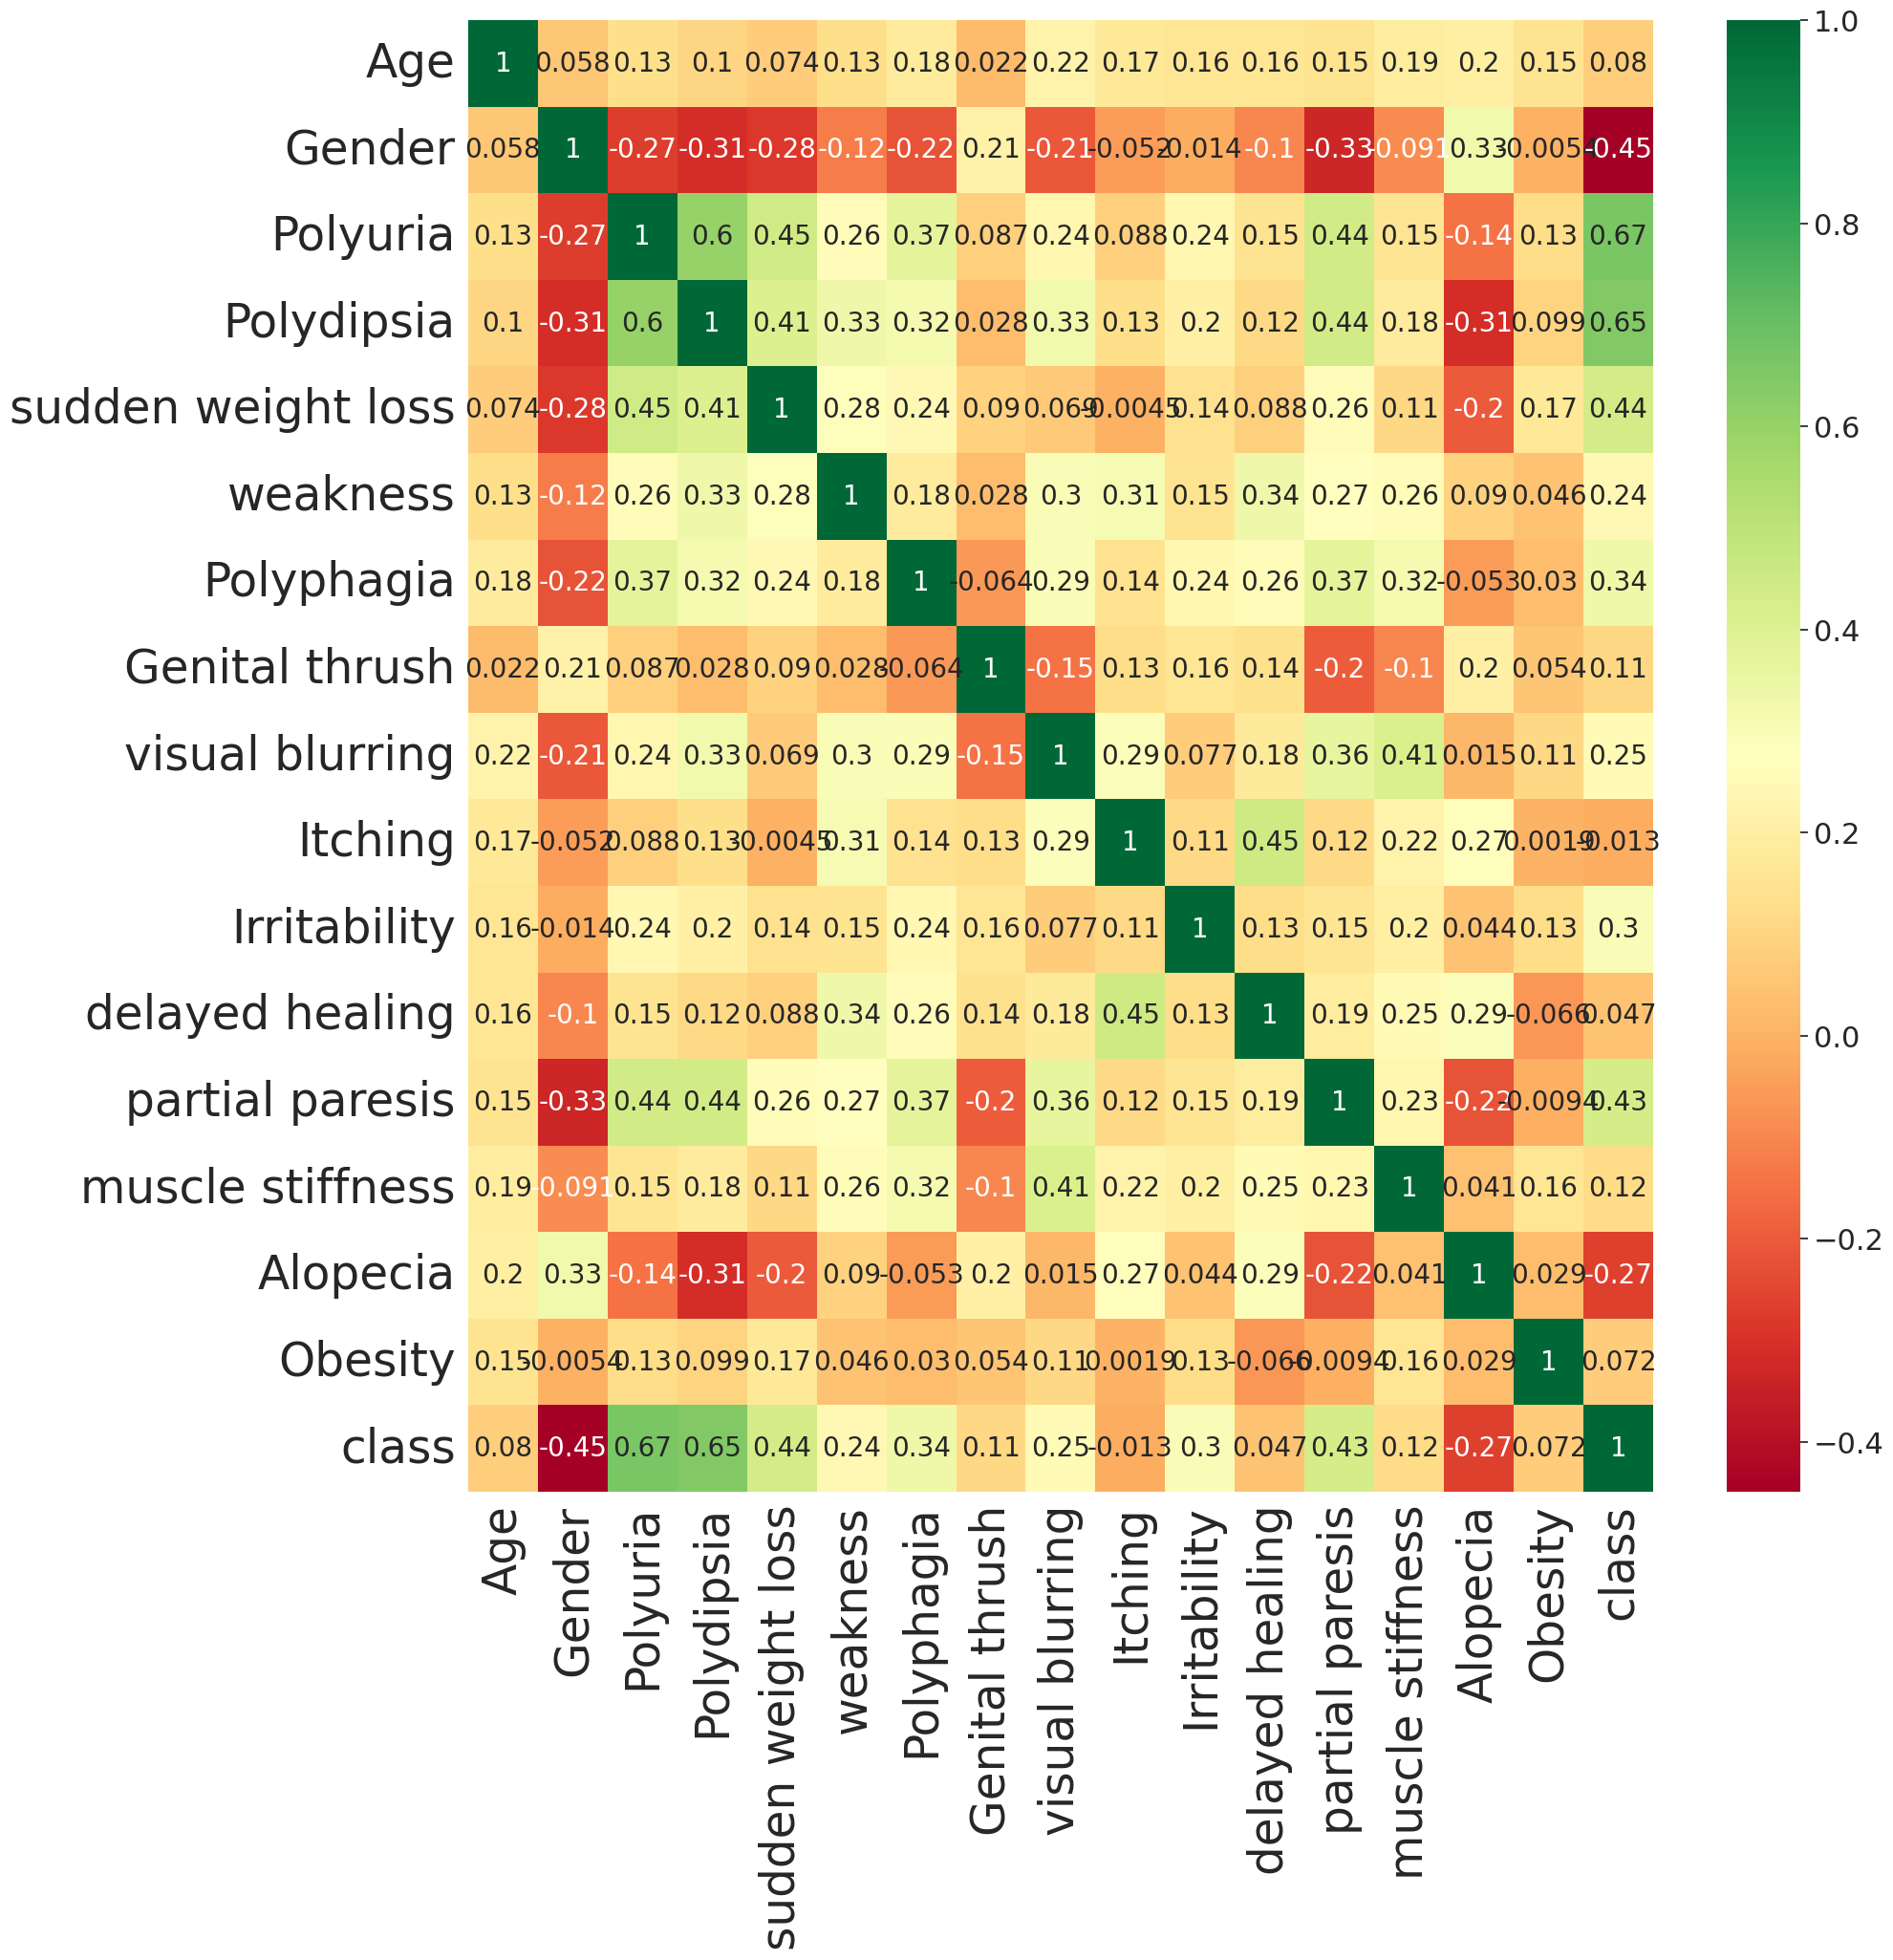

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 2)
plt.subplots(figsize=(20,20))
heat_plot = sns.heatmap(df.corr(method='pearson'), annot=True, cmap='RdYlGn', annot_kws={'size': 20})



plt.yticks(fontsize = 35)
plt.xticks(fontsize = 35)

plt.show()


In [ ]:
correleations = df.corr(method='pearson')
print(correleations['class'].sort_values(ascending=False).to_string())

class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.079512
Obesity               0.072173
delayed healing       0.046980
Itching              -0.013384
Alopecia             -0.267512
Gender               -0.449233


In [ ]:
df['class'].iloc[0:200]

,class
0,1
1,1
2,1
3,1
4,1
...,...
195,1
196,1
197,1
198,1


# Shuffle

In [ ]:
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    Shuffle
    </strong>
</p>
"""

display(HTML(html_code))

In [ ]:
from sklearn.utils import shuffle
shuffled_df = shuffle(df)

In [ ]:
rearranged_df = shuffled_df.reset_index(drop=True)



# 1. shuffled_df.reset_index():
# Purpose: It resets the index of the DataFrame shuffled_df back to the default integer index (0, 1, 2, ...).
# By default, when you shuffle or re-arrange rows in a DataFrame, the original index is kept alongside the data.
# This method drops the existing index and replaces it with a new sequential index.


# 2. drop=True:
# Purpose: When you reset the index, if drop=False (default), the old index will be added as a new column in the DataFrame.
# However, drop=True tells pandas not to keep the old index as a column. It simply removes it.

In [ ]:
rearranged_df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,60.0,0,1,1,1,1,1,0,1,1,0,1,1,1,0,1,1
1,55.0,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
2,33.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,85.0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1
4,57.0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,40.0,0,1,1,1,1,0,0,1,0,0,1,1,1,0,0,1
516,53.0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,0
517,72.0,1,1,0,0,0,1,0,1,1,0,1,1,1,1,0,0
518,55.0,0,1,1,1,1,0,0,1,0,0,0,1,0,0,1,1


# Train - Test split

In [ ]:
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    Train - Test split
    </strong>
</p>
"""

display(HTML(html_code))

In [ ]:
x = rearranged_df.drop(columns=['class'])
x

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,60.0,0,1,1,1,1,1,0,1,1,0,1,1,1,0,1
1,55.0,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
2,33.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,85.0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0
4,57.0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,40.0,0,1,1,1,1,0,0,1,0,0,1,1,1,0,0
516,53.0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0
517,72.0,1,1,0,0,0,1,0,1,1,0,1,1,1,1,0
518,55.0,0,1,1,1,1,0,0,1,0,0,0,1,0,0,1


In [ ]:
y = rearranged_df['class']
y

,class
0,1
1,1
2,0
3,1
4,0
...,...
515,1
516,0
517,0
518,1


# Scaling dataset

In [ ]:
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    Scaling Dataset
    </strong>
</p>
"""

display(HTML(html_code))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler1 = MinMaxScaler()
MinMax_scaled_df = scaler1.fit_transform(x)


In [ ]:
MinMax_scaled_df

array([[0.07534247, 0.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.06678082, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02910959, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.09589041, 1.        , 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.06678082, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.06335616, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [ ]:
print("train data size (features):",len(x_train))
print("train data size (target):",len(y_train))

print("test data size(feature)",len(x_test))
print("test data size(target)",len(y_test))

train data size (features): 416
train data size (target): 416
test data size(feature) 104
test data size(target) 104


In [8]:
# @title Naive Bayes
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    Naive Bayes
    </strong>
</p>
"""

display(HTML(html_code))

Penalty : Regulirazation
solver : optimization (converge model to make loss minimum)


Take help from the documentation :
https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    Evaluation Matrices
    </strong>
</p>
"""

display(HTML(html_code))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
accuracy = accuracy_score(y_test,pred_values)
precision = precision_score(y_test,pred_values)
recall = recall_score(y_test,pred_values)
f1 = f1_score(y_test,pred_values)
AUC = roc_auc_score(y_test,pred_values)



In [ ]:
print("accuracy : ",accuracy)
print("precision : ",precision)
print("recall : ",recall)
print("f1 score : ",f1)
print("AUC Score : ",AUC)

accuracy :  0.9711538461538461
precision :  0.9833333333333333
recall :  0.9672131147540983
f1 score :  0.9752066115702479
AUC Score :  0.9719786504003048


In [ ]:
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    ROC CURVE
    </strong>
</p>
"""

display(HTML(html_code))

In [ ]:
roc_score = model.predict_proba(x_test)[:,1]
fpr,tpr,threshold2 = roc_curve(y_test,roc_score)

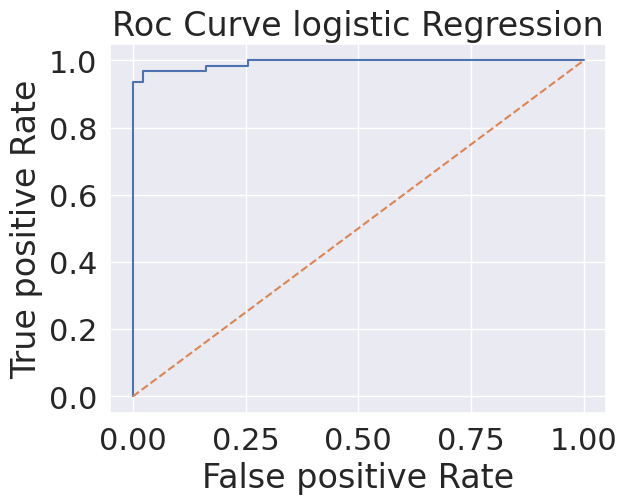

In [ ]:
plt.plot(fpr,tpr)
plt.plot([0,1],ls="--")  #random choice

plt.title("Roc Curve logistic Regression")
plt.ylabel("True positive Rate")
plt.xlabel("False positive Rate")
plt.show()

# End of this section